In [1]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Загрузка датасета
from sklearn.datasets import load_iris
x, y = load_iris(return_X_y=True)

In [2]:
# Переведем массив со значениями классов Y в категориальный вид
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = np.reshape(y, [-1, 1])
encoder.fit(y)
y = encoder.transform(y).toarray()
y = pd.DataFrame(y, columns=['1 sort', '2 sort', '3 sort'])


In [3]:
# Стандартизация значений признаков X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)

In [4]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.5, random_state=0)


# Импорт библиотек Keras TensorFlow
import tensorflow as tf

In [5]:
# Преобразование данных в формат тензоров TensorFlow
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.float32)


# Задание конфигурации нейронной сети
n_input_neurons = np.shape(x_train)[1]
n_layer1_neurons = 3
n_layer2_neurons = 3
n_output_neurons = np.shape(y_train)[1]

In [6]:
# Установим начальные значения весов
initialize_weighs = tf.random.normal
initialize_bias = tf.random.normal


# Выберем функции активации нейронов
activation_layer1 = tf.nn.relu
activation_layer2 = tf.nn.relu
activation_output = tf.nn.softmax

In [7]:
# Выберем алгоритм градиентного спуска и настроим его
s_batch = 10
learn_rate = 0.001
n_epochs = 400
optimizer = tf.optimizers.Adam(learning_rate=learn_rate)

In [8]:
# Выбираем функцию потерь для отслеживания ошибки во время обучения
loss_function = tf.losses.categorical_crossentropy


# Выбираем функцию ошибки для отслеживания точности модели во время обучения
accuracy = tf.metrics.CategoricalAccuracy()

In [9]:
# Импортируем класс Sequential() - это шаблон последовательной модели нейросети
# Создадим модель, то есть экземпляр класса
from tensorflow.keras import Sequential
Model = Sequential()


In [10]:
# Добавим в нашу модель слои, мы указали 2 промежуточных слоя
from tensorflow.keras.layers import Dense

Model.add(Dense(n_layer1_neurons, activation=activation_layer1, name='layer1'))

Model.add(Dense(n_layer2_neurons, activation=activation_layer2, name='layer2'))

Model.add(Dense(n_output_neurons, activation=activation_output, name='output'))

Model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.7311 - loss: 1.0770
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7291 - loss: 1.0723 
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7112 - loss: 1.0694 
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - categorical_accuracy: 0.7095 - loss: 1.0677  
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8025 - loss: 1.0385 
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.7527 - loss: 1.0461  
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7248 - loss: 1.0455 
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.7021 - loss: 1.0411 
Epoch 9/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.6944 - loss: 1.0396  
Epoch 10/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7144 - loss: 1.0307  
Epoch 11/400
8/8 ━━━━━━━━━━━━━━━━━━━━

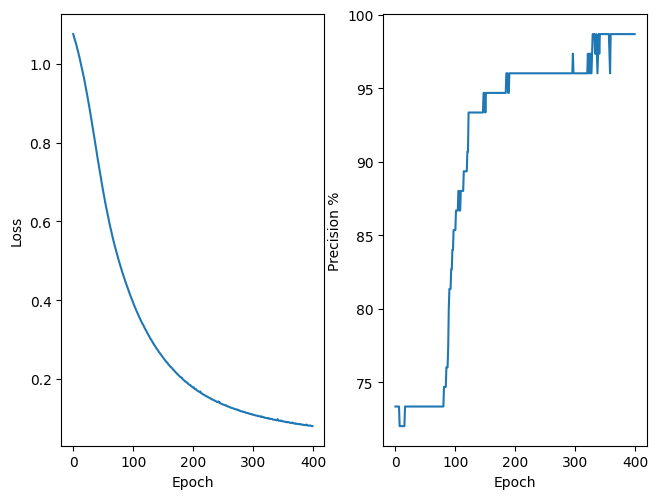

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - categorical_accuracy: 0.9894 - loss: 0.0748   
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - categorical_accuracy: 0.9393 - loss: 0.1192  
Точность модели на тренировочной выборке = 98.66666793823242 %
Точность модели на тестовой выборке = 93.33333373069763 %


In [11]:
# Запустим обучение созданной нами модели
# данные о процессе обучения сохраним в model_train
model_train = Model.fit(x_train, y_train, batch_size=s_batch, epochs=n_epochs)


# На данном этапе мы получили обученную модель нейронной сети
# Первым делом посмотрим, как шел процесс обучения, то есть как
# изменялась функция потерь и точность модели
loss = np.array(model_train.history['loss'])
accur = np.array(model_train.history['categorical_accuracy'])*100


fig1 = plt.figure()

axs1 = fig1.add_subplot(1, 2, 1, xlabel='Epoch', ylabel='Loss')

gph1 = axs1.plot(loss)

axs2 = fig1.add_subplot(1, 2, 2, xlabel='Epoch', ylabel='Precision %')

gph2 = axs2.plot(accur)

plt.tight_layout(pad=0)
plt.show()


# Оценка эффективности нейронной сети обучающей и тестовой выборке
accur_train = Model.evaluate(x_train, y_train)[1]*100
accur_test = Model.evaluate(x_test, y_test)[1]*100
print(f'Точность модели на тренировочной выборке = {accur_train} %')
print(f'Точность модели на тестовой выборке = {accur_test} %')
